1.1

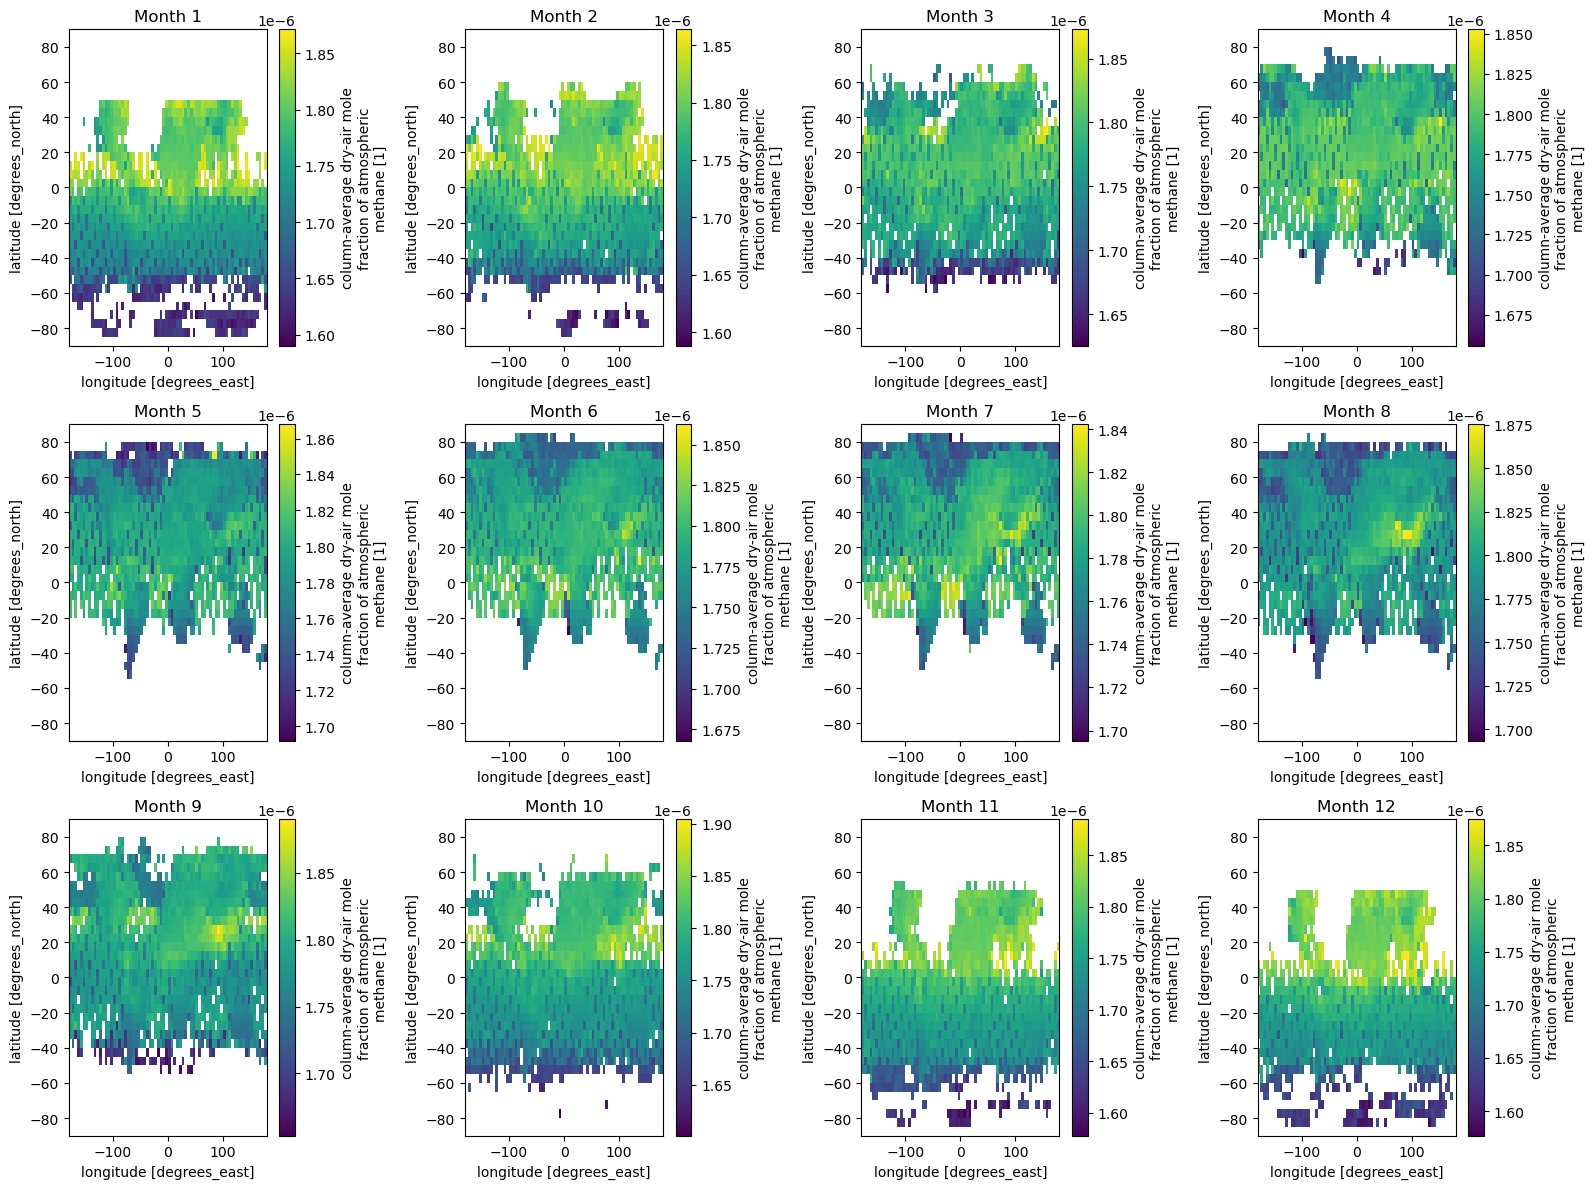

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cftime import num2date

# 打开netCDF文件
ds = xr.open_dataset('200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc')

# 提取甲烷数据
methane_data = ds['xch4']

# 计算每个月的气候平均值
monthly_climatology = methane_data.groupby('time.month').mean('time')

# 绘制每个月的气候平均值
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for i, ax in enumerate(axes.flatten()):
    monthly_climatology.isel(month=i).plot(ax=ax)
    ax.set_title(f'Month {i+1}')
plt.tight_layout()
plt.show()

打开netCDF文件：使用xarray库打开提供的甲烷数据文件。
提取甲烷数据：从数据集中提取甲烷数据
计算每个月的气候平均值：对每个月的甲烷数据进行平均，得到每个月的气候平均。
绘制每个月的气候平均值：使用matplotlib绘制每个月的气候平均值，共12个面板。

1.2

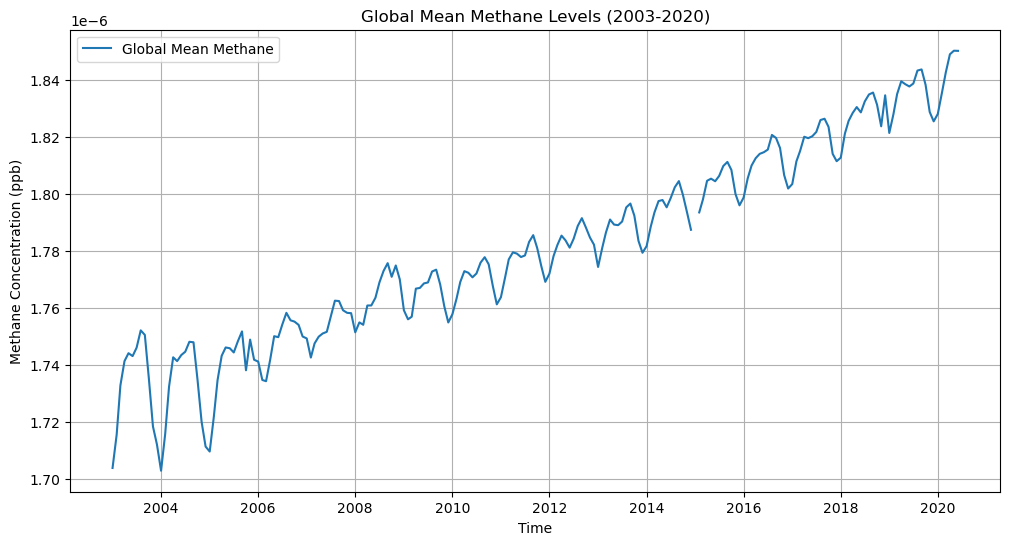

In [16]:
# 计算全球平均甲烷
global_mean_methane = methane_data.mean(['lat', 'lon'])

# 将时间序列转换为Pandas DataFrame
global_mean_methane_df = global_mean_methane.to_dataframe().reset_index()

# 将时间索引转换为日期时间格式
global_mean_methane_df['time'] = pd.to_datetime(global_mean_methane_df['time'].dt.strftime('%Y-%m'))

# 绘制全球平均甲烷时间序列
plt.figure(figsize=(12, 6))
plt.plot(global_mean_methane_df['time'], global_mean_methane_df['xch4'], label='Global Mean Methane')
plt.title('Global Mean Methane Levels (2003-2020)')
plt.xlabel('Time')
plt.ylabel('Methane Concentration (ppb)')
plt.legend()
plt.grid(True)
plt.show()


图表显示了一个明显的上升趋势，但虽然总体趋势是上升的，但每年的增加速率有所变化。图中没有明确显示季节性模式，因为数据是按年度平均的。而甲烷浓度的增加可能与多种因素有关，包括人类活动（如化石燃料的开采和使用、农业排放）、自然过程（如湿地排放）以及气候变化的影响，甲烷是一种强效温室气体，其在大气中的浓度增加对全球气候变化有显著影响。这可能导致全球变暖、极端天气事件和其他环境问题。

计算全球平均甲烷：计算全球平均甲烷浓度。
绘制全球平均甲烷时间序列：使用matplotlib绘制全球平均甲烷浓度的时间序列图。

1.3

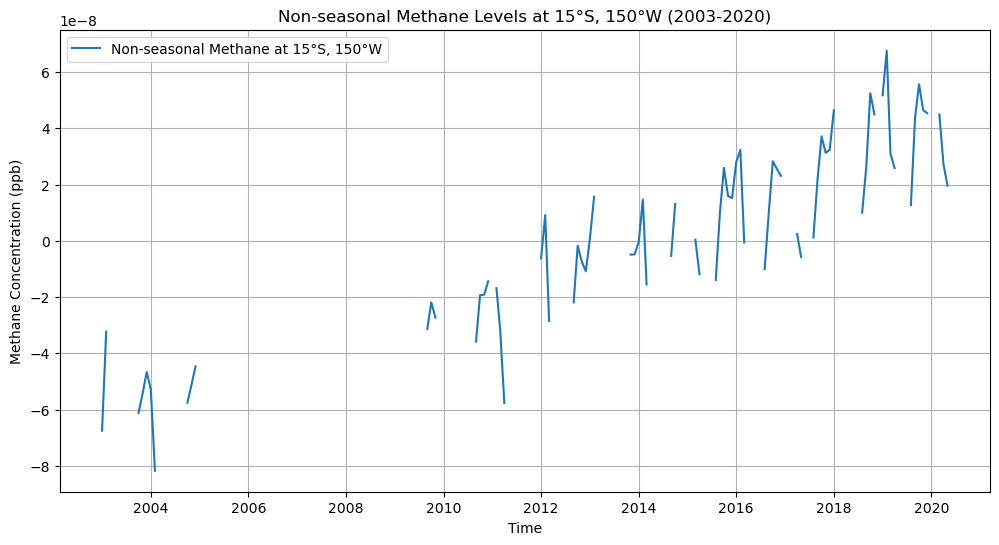

In [17]:
# 提取[15°S, 150°W]点的甲烷数据
point_methane_data = methane_data.sel(lat=-15, lon=150, method='nearest')

# 计算非季节性甲烷水平
non_seasonal_methane = point_methane_data.groupby('time.month') - monthly_climatology.sel(lat=-15, lon=150, method='nearest')

# 将时间序列转换为Pandas DataFrame以便于绘图
non_seasonal_methane_df = non_seasonal_methane.to_dataframe().reset_index()

# 将时间索引转换为日期时间格式
non_seasonal_methane_df['time'] = pd.to_datetime(non_seasonal_methane_df['time'].dt.strftime('%Y-%m'))

# 绘制非季节性甲烷水平时间序列
plt.figure(figsize=(12, 6))
plt.plot(non_seasonal_methane_df['time'], non_seasonal_methane_df['xch4'], label='Non-seasonal Methane at 15°S, 150°W')
plt.title('Non-seasonal Methane Levels at 15°S, 150°W (2003-2020)')
plt.xlabel('Time')
plt.ylabel('Methane Concentration (ppb)')
plt.legend()
plt.grid(True)
plt.show()

图2003年至2020年在15°S, 150°W这个特定地理位置的非季节性甲烷水平的变化趋势，此图虽然不是一条平滑的直线，但整体上可以看出甲烷水平在这段时间内呈现上升趋势。图表中的甲烷水平在正负值之间波动，表明可能存在多种因素影响这一特定地理位置的甲烷浓度。
波动的幅度在不同年份有所不同，可能反映了不同年份的环境条件变化这些波动可能与多种因素有关，包括局部的生物排放、大气环流的变化、土地利用变化、以及可能的人类活动影响。


提取[15°S, 150°W]点的甲烷数据：从数据集中提取指定经纬度点的甲烷数据。
计算非季节性甲烷水平：从每个月的甲烷数据中减去相应的月气候平均值，得到非季节性甲烷水平
绘制非季节性甲烷水平时间序列：使用matplotlib绘制非季节性甲烷水平的时间序列图。

2.1

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cftime import num2date

# 打开netCDF文件
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')

# 提取Niño 3.4区域的SST数据
nino34 = ds.sel(lat=slice(-5, 5), lon=slice(190, 240))['sst']

# 计算月气候学
climatology = nino34.groupby('time.month').mean('time')

# 计算SST异常
anomalies = nino34.groupby('time.month') - climatology
print(climatology)
print(anomalies)

<xarray.DataArray 'sst' (month: 12, lat: 5, lon: 26)>
array([[[28.603327, 28.46709 , 28.329628, ..., 25.547432, 25.407318,
         25.278002],
        [28.066399, 27.915398, 27.768072, ..., 25.050482, 24.91376 ,
         24.782074],
        [27.704035, 27.550066, 27.402925, ..., 24.939613, 24.821255,
         24.694103],
        [27.733974, 27.594133, 27.458607, ..., 25.548328, 25.472971,
         25.376846],
        [27.979864, 27.871954, 27.765362, ..., 26.36988 , 26.3484  ,
         26.305618]],

       [[28.540337, 28.406334, 28.285015, ..., 26.240774, 26.166866,
         26.114462],
        [27.93303 , 27.779905, 27.645334, ..., 25.759432, 25.692144,
         25.656687],
        [27.53061 , 27.37174 , 27.229572, ..., 25.599237, 25.549782,
         25.52225 ],
        [27.580507, 27.433657, 27.294996, ..., 26.10608 , 26.09529 ,
         26.081562],
        [27.879517, 27.76656 , 27.654293, ..., 26.763283, 26.789177,
...
         24.778183],
        [28.425577, 28.266651, 28.103579

打开netCDF文件：使用xarray库打开NOAA提供的SST数据文件。
提取Niño 3.4区域的SST数据：根据Niño 3.4区域的经纬度范围，从数据集中提取相应的SST数据
计算月气候学：对每个月的SST数据进行平均，得到月气候。
计算SST异常：从每个月的SST数据中减去相应的月气候学，得到SST异常。

2.2

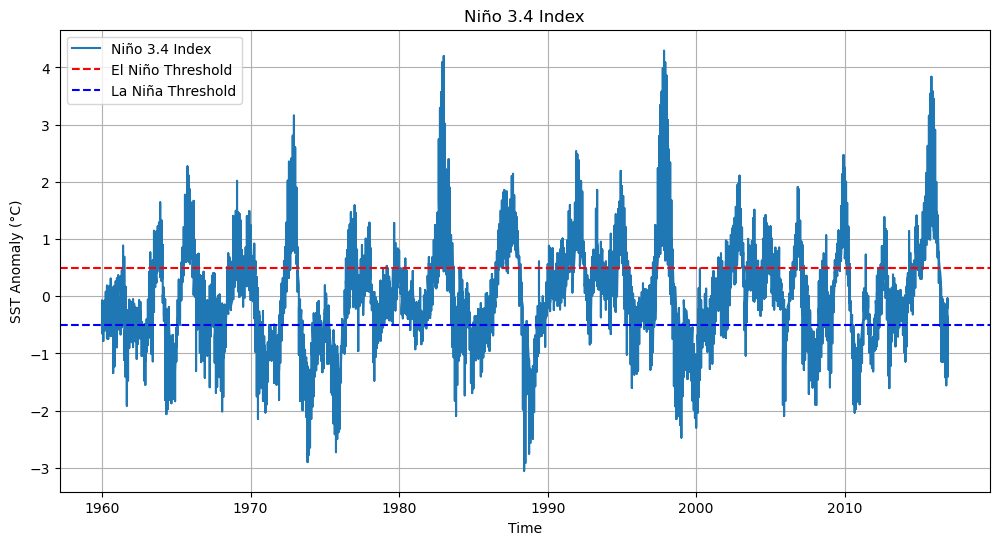

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cftime import num2date

# 打开netCDF文件
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')

# 提取Niño 3.4区域的SST数据
nino34 = ds.sel(lat=slice(-5, 5), lon=slice(190, 240))['sst']

# 计算月气候学
climatology = nino34.groupby('time.month').mean('time')

# 计算SST异常
anomalies = nino34.groupby('time.month') - climatology

# 将时间序列转换为Pandas DataFrame以便于绘图
anomalies_df = anomalies.to_dataframe().reset_index()

# 将时间索引转换为日期时间格式
anomalies_df['time'] = pd.to_datetime(anomalies_df['time'].dt.strftime('%Y-%m'))

# 绘制Niño 3.4指数
plt.figure(figsize=(12, 6))
plt.plot(anomalies_df['time'], anomalies_df['sst'], label='Niño 3.4 Index')
plt.axhline(y=0.5, color='r', linestyle='--', label='El Niño Threshold')
plt.axhline(y=-0.5, color='b', linestyle='--', label='La Niña Threshold')
plt.title('Niño 3.4 Index')
plt.xlabel('Time')
plt.ylabel('SST Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

将时间序列转换为Pandas DataFrame以便于绘图：将计算得到的SST异常数据转换为Pandas DataFrame，以便于使用matplotlib进行绘图。
绘制Niño 3.4指数：使用matplotlib绘制Niño 3.4指数的时间序列图，并添加El Niño和La Niña的阈值线。

3.1

In [2]:
import os
import xarray as xr
import glob

# 使用 glob 获取文件夹中所有 .nc4 文件
file_paths = glob.glob(os.path.join("OCO2_GEOS_L3CO2_2", "*.nc4"))

# 读取所有 .nc4 文件并合并

datasets = []
for file_path in file_paths:
    ds = xr.open_dataset(file_path)  # 打开单个文件
    datasets.append(ds)

# 合并所有文件，假设时间维度是 'time'
combined_dataset = xr.concat(datasets, dim="time")

# 保存合并后的数据集为一个新的 .nc 文件
combined_dataset.to_netcdf("oco2_GEOS_L3CO2_month_2015-2022.nc")


合并文件

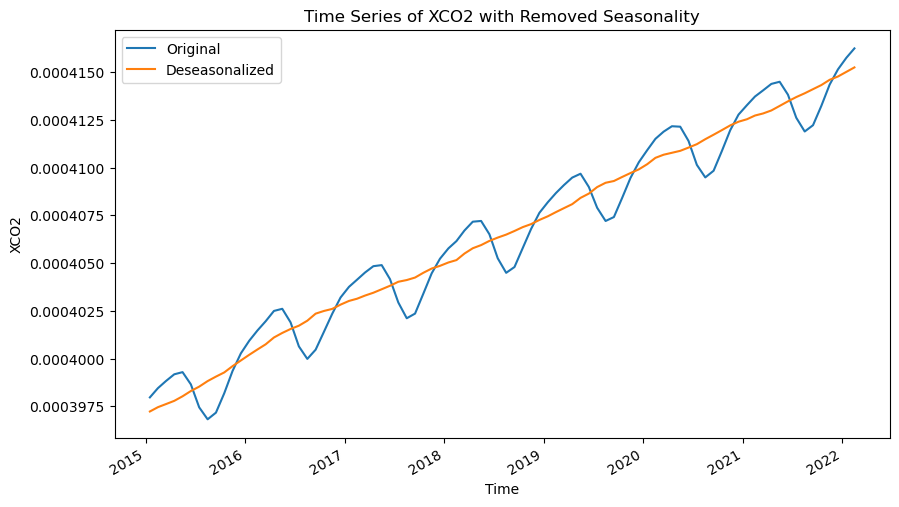

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# 打开NetCDF文件
ds = xr.open_dataset('oco2_GEOS_L3CO2_month_2015-2022.nc')

# 选择二氧化碳浓度变量
co2_concentration = ds['XCO2'].mean(dim=['lat', 'lon'])  # 假设我们对全球平均值感兴趣

# 将xarray数据转换为pandas序列
co2_series = co2_concentration.to_pandas()

# 进行季节性分解
decomposition = seasonal_decompose(co2_series, model='additive', period=12)  # 假设周期为12个月

# 去除季节周期
co2_deseasonalized = co2_series - decomposition.seasonal

# 绘制原始数据和去季节周期后的数据
plt.figure(figsize=(10, 6))
co2_series.plot(label='Original')
co2_deseasonalized.plot(label='Deseasonalized')
plt.legend()
plt.title('Time Series of XCO2 with Removed Seasonality')
plt.xlabel('Time')
plt.ylabel('XCO2')
plt.show()



首先提取了全球平均二氧化碳浓度的时间序列。接着，将这个时间序列从xarray数据结构转换为pandas序列，以便使用statsmodels进行季节性分解。分解后，代码计算了去季节性的数据，即从原始数据中减去季节性成分。最后，代码使用matplotlib绘制了两个图表：一个是原始的全球平均二氧化碳浓度时间序列，另一个是去除季节性周期后的时间序列，以直观展示季节性分解的效果。

3.2

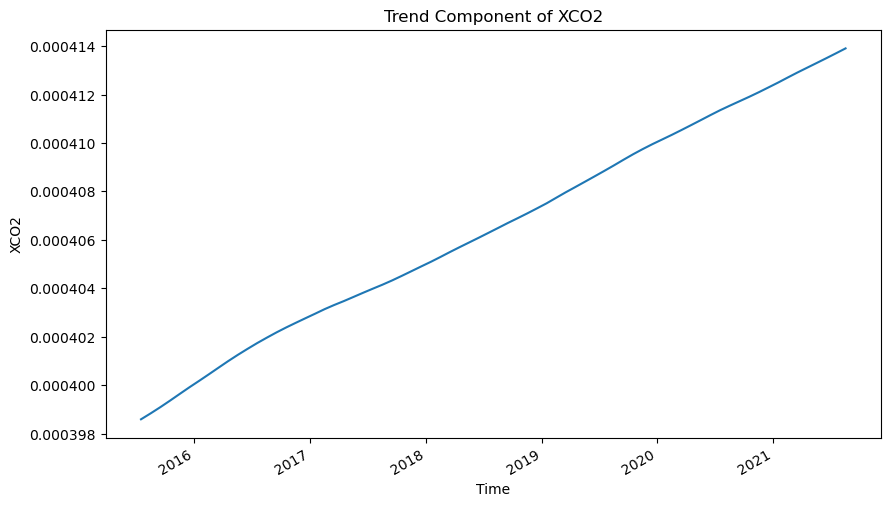

In [4]:
plt.figure(figsize=(10, 6))
decomposition.trend.plot()
plt.title('Trend Component of XCO2')
plt.xlabel('Time')
plt.ylabel('XCO2')
plt.show()

In [ ]:
趋势成分图

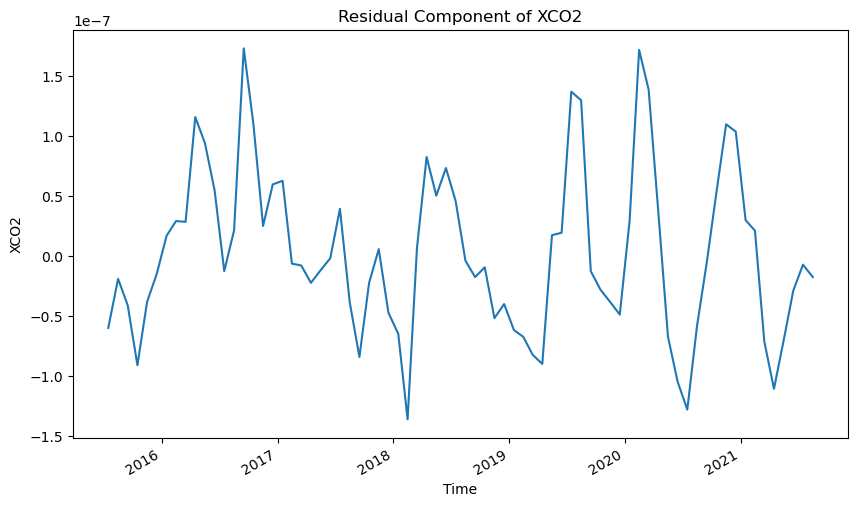

In [5]:
plt.figure(figsize=(10, 6))
decomposition.resid.plot()
plt.title('Residual Component of XCO2')
plt.xlabel('Time')
plt.ylabel('XCO2')
plt.show()

残差图

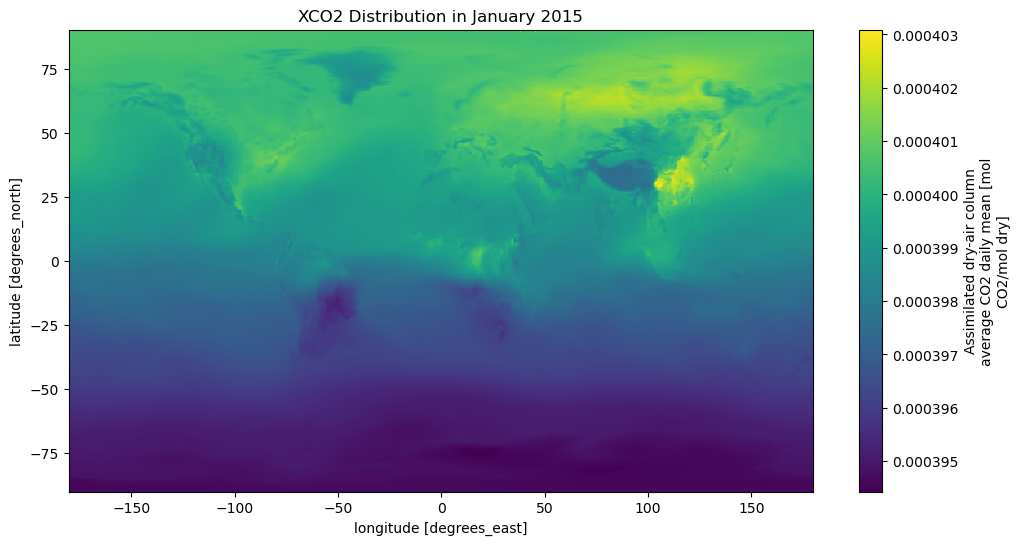

In [11]:
# 选择一个时间点，例如2015年1月
xco2_jan_2015 = ds.sel(time='2015-01')

# 绘制XCO2的地理分布
plt.figure(figsize=(12, 6))
xco2_jan_2015['XCO2'].plot()
plt.title('XCO2 Distribution in January 2015')
plt.show()

XCO2的地理分布图

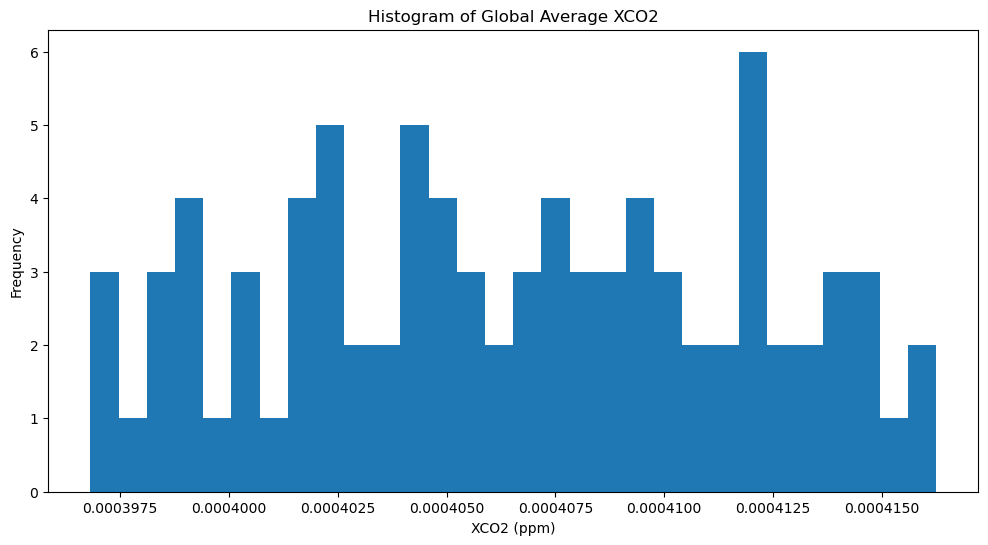

In [16]:

# 计算全球平均XCO2
xco2_global_mean = co2_concentration.mean(dim=['lat', 'lon'])

# 绘制XCO2的直方图
plt.figure(figsize=(12, 6))
xco2_global_mean.plot.hist(bins=30)
plt.title('Histogram of Global Average XCO2')
plt.xlabel('XCO2 (ppm)')
plt.ylabel('Frequency')
plt.show()


XCO2的直方图（显示XCO2值的分布）

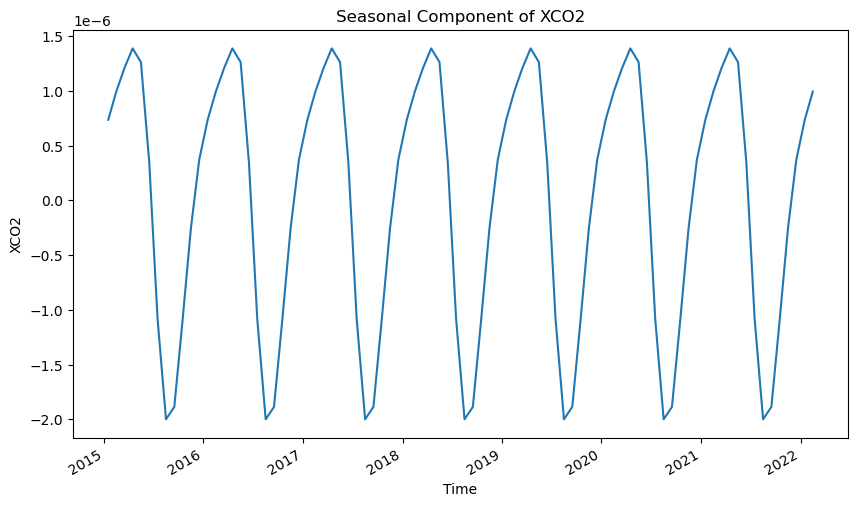

In [17]:
plt.figure(figsize=(10, 6))
decomposition.seasonal.plot()
plt.title('Seasonal Component of XCO2')
plt.xlabel('Time')
plt.ylabel('XCO2')
plt.show()

XCO2的季节成分图

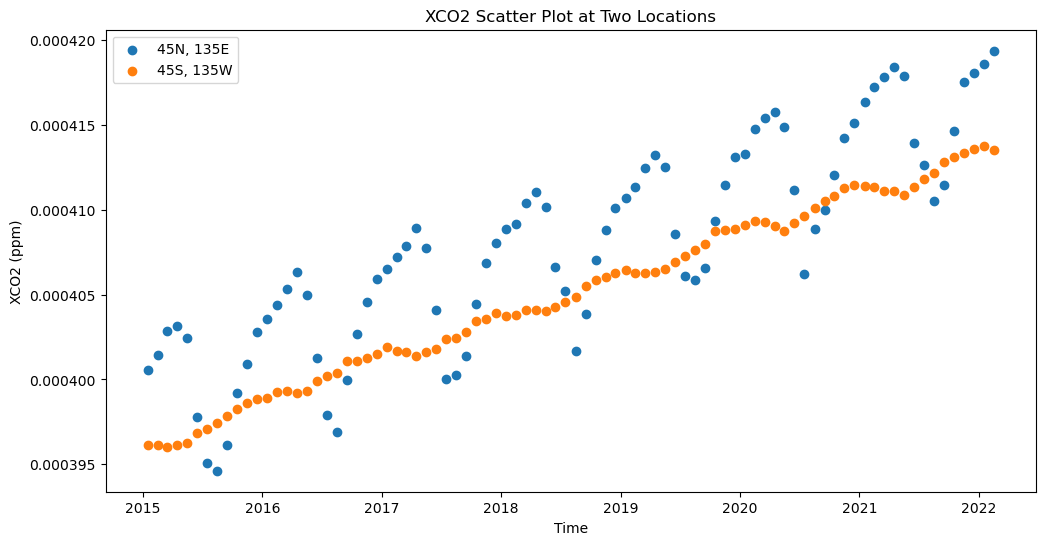

In [18]:
# 选择两个不同的地理位置，例如北纬45度，东经135度和南纬45度，西经135度
xco2_location1 = ds.sel(lat=45, lon=135, method='nearest')
xco2_location2 = ds.sel(lat=-45, lon=-135, method='nearest')

# 绘制XCO2的散点图
plt.figure(figsize=(12, 6))
plt.scatter(xco2_location1['time'], xco2_location1['XCO2'], label='45N, 135E')
plt.scatter(xco2_location2['time'], xco2_location2['XCO2'], label='45S, 135W')
plt.title('XCO2 Scatter Plot at Two Locations')
plt.xlabel('Time')
plt.ylabel('XCO2 (ppm)')
plt.legend()
plt.show()

XCO2的散点图（显示两个不同地理位置的XCO2值）